In [71]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [72]:
dataset_name = "daily_weather"

In [79]:
input_fname = "weather_data.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [80]:
data = pd.read_csv(input_fname, parse_dates=['date'])
data.head()

,date,date_epoch,mintemp,maxtemp,avgtemp,totalsnow,sunhour,uv_index,time,temperature,...,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,query,location,country,region
0,2020-01-01,1577836800,1,4,2,0.0,8.7,2,0,4,...,7:20 AM,4:39 PM,11:25 AM,11:02 PM,Waxing Crescent,37,"New York City, United States of America",New York City,United States of America,New York
1,2020-01-02,1577923200,0,8,3,0.0,8.7,2,0,8,...,7:20 AM,4:40 PM,11:49 AM,12:00 AM,First Quarter,44,"New York City, United States of America",New York City,United States of America,New York
2,2020-01-03,1578009600,5,9,7,0.0,3.5,2,0,9,...,7:20 AM,4:41 PM,12:13 PM,No moonset,First Quarter,51,"New York City, United States of America",New York City,United States of America,New York
3,2020-01-04,1578096000,4,11,8,0.0,3.5,2,0,11,...,7:20 AM,4:41 PM,12:38 PM,12:58 AM,First Quarter,59,"New York City, United States of America",New York City,United States of America,New York
4,2020-01-05,1578182400,1,5,3,0.0,8.7,2,0,5,...,7:20 AM,4:42 PM,1:05 PM,1:58 AM,First Quarter,66,"New York City, United States of America",New York City,United States of America,New York


In [81]:
data.columns

Index(['date', 'date_epoch', 'mintemp', 'maxtemp', 'avgtemp', 'totalsnow',
       'sunhour', 'uv_index', 'time', 'temperature', 'wind_speed',
       'wind_degree', 'wind_dir', 'weather_code', 'weather_icons',
       'weather_descriptions', 'precip', 'humidity', 'visibility', 'pressure',
       'cloudcover', 'heatindex', 'dewpoint', 'windchill', 'windgust',
       'feelslike', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'moon_illumination', 'query', 'location', 'country', 'region'],
      dtype='object')

In [82]:
data[['location', 'country']].value_counts()

location        country                 
Bangkok         Thailand                    1096
Barcelona       Spain                       1096
Toronto         Canada                      1096
Tokyo           Japan                       1096
Sydney          Australia                   1096
Santiago        Chile                       1096
Rome            Italy                       1096
Rio De Janeiro  Brazil                      1096
Paris           France                      1096
New York City   United States of America    1096
Nairobi         Kenya                       1096
Mumbai          India                       1096
Mexico City     Mexico                      1096
Marrakesh       Morocco                     1096
Los Angeles     United States of America    1096
London          United Kingdom              1096
Lima            Peru                        1096
Lagos           Nigeria                     1096
Dubai           United Arab Emirates        1096
Cape Town       South Africa

# Prepare Data

In [83]:
series_col = "location"
epoch_col = 'epoch'
epoch_label = "day"
time_col = 'date'
value_col = 'temperature'
exog_cols = [
    'mintemp', 'maxtemp', 'avgtemp', 'sunhour', 'uv_index', 'wind_speed', 'wind_degree',
    'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'dewpoint',
    'windchill', 'windgust', 'feelslike', 
]

In [89]:
len(exog_cols)

17

## Update Location field

In [84]:
data['location'] = data['query']

 ## Add Epochs

In [85]:
if epoch_col not in data: 
    unique_times = sorted(data[time_col].drop_duplicates().tolist())
    times_to_epoch = {
        t: i for i, t in enumerate(unique_times)
    }
    #print(yrmt_to_epoch)
    data.insert(1, epoch_col, data[time_col].map(times_to_epoch))
data.head()

,date,epoch,date_epoch,mintemp,maxtemp,avgtemp,totalsnow,sunhour,uv_index,time,...,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,query,location,country,region
0,2020-01-01,0,1577836800,1,4,2,0.0,8.7,2,0,...,7:20 AM,4:39 PM,11:25 AM,11:02 PM,Waxing Crescent,37,"New York City, United States of America","New York City, United States of America",United States of America,New York
1,2020-01-02,1,1577923200,0,8,3,0.0,8.7,2,0,...,7:20 AM,4:40 PM,11:49 AM,12:00 AM,First Quarter,44,"New York City, United States of America","New York City, United States of America",United States of America,New York
2,2020-01-03,2,1578009600,5,9,7,0.0,3.5,2,0,...,7:20 AM,4:41 PM,12:13 PM,No moonset,First Quarter,51,"New York City, United States of America","New York City, United States of America",United States of America,New York
3,2020-01-04,3,1578096000,4,11,8,0.0,3.5,2,0,...,7:20 AM,4:41 PM,12:38 PM,12:58 AM,First Quarter,59,"New York City, United States of America","New York City, United States of America",United States of America,New York
4,2020-01-05,4,1578182400,1,5,3,0.0,8.7,2,0,...,7:20 AM,4:42 PM,1:05 PM,1:58 AM,First Quarter,66,"New York City, United States of America","New York City, United States of America",United States of America,New York


# Visualize Data

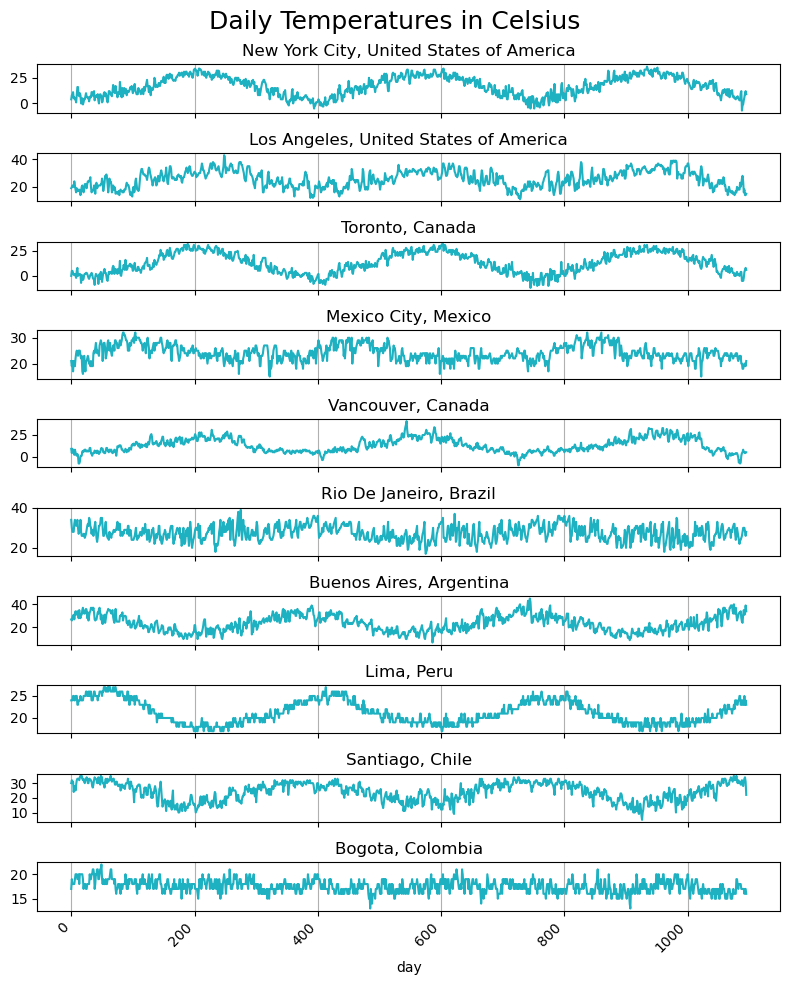

In [86]:
import matplotlib.pyplot as plt

def plot_trends(df, series_col, val_col, epoch_col, epoch_label, num_series=10,
                filepath=outp_fig_fname, chart_title=dataset_name):
    """
    This function takes a dataframe and a number of series to chart.
    It creates a n x 1 subplot (with n being the number of series, at most 10) and plots those series.
    
    Parameters:
    df (DataFrame): dataframe.
    num_series (int): The number of series to plot, defaulted to 10.
    """
    
    # Get the unique series from the dataframe
    unique_series = df[series_col].unique()
    
    # Limit the number of series to plot
    series_to_plot = unique_series[:min(len(unique_series), num_series)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_series, len(series_to_plot)), ncols=1, figsize=(8, num_series*1))
    
    # If there's only one series to plot, axes will not be an array, so we wrap it in a list
    if num_series == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each series on a separate subplot
    for i, (ax, series_id) in enumerate(zip(axes, series_to_plot)):
        # Filter the dataframe for the current series
        series_data = df[df[series_col] == series_id]
                
        # Plot the data
        ax.plot(series_data[epoch_col], series_data[val_col], color=plot_color)
        
        # Set the title and labels
        ax.set_title(series_id)
        # ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(series_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel(epoch_label)            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(chart_title, fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Plot a few series
plot_trends(
    data,
    series_col=series_col,
    val_col=value_col,
    epoch_col=epoch_col,
    epoch_label=epoch_label,
    num_series=10,
    filepath=outp_fig_fname,
    chart_title="Daily Temperatures in Celsius"
)  


## Reorder columns

In [87]:
all_cols = [series_col, epoch_col, value_col] + exog_cols
print(all_cols)

['location', 'epoch', 'temperature', 'mintemp', 'maxtemp', 'avgtemp', 'sunhour', 'uv_index', 'wind_speed', 'wind_degree', 'precip', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatindex', 'dewpoint', 'windchill', 'windgust', 'feelslike']


# Save Main Data File

In [88]:
data[all_cols].to_csv(outp_fname, index=False)